In [ ]:
"""Prototype 1"""
from scipy import signal
import matplotlib.pyplot as plot
import numpy as np
def Gen_squ_wave(p_freq, maxNum = 20):
    plot_pts = 1000
    n = np.linspace(0, maxNum, plot_pts, endpoint=True)
    
    #square wave to represnts prime number as frequency
    (amp_scale,amp_shift) = (0.5,-0.5) #range -1 < p_wave < 0 
    shift_right = -((1/p_freq)*np.pi)
    d = 1-(1/p_freq)
    scale_wave = 2/p_freq #dip always 1 therefore duty
    cover_count = amp_scale*signal.square((scale_wave*np.pi*n)+shift_right, duty = d) + amp_shift
    
    #to include given prime freq in p detection
    p_start = int((plot_pts/(2*maxNum))*(2*p_freq-1))
    p_end = int((plot_pts/(2*maxNum))*(2*p_freq+1))
    cover_count[p_start:p_end]+=1
    
    # Plot the square wave
    plot.plot(n, cover_count)
    plot.xticks(range(0, int(max(n)), 1))
    # Give x,y,title axis label
    plot.xlabel('Whole Numbers')
    plot.ylabel('composit lvl')
    plot.title('Prime Wave Coverage')
    plot.axhline(y = 0, color = 'r')
    # Display
    plot.grid()
    plot.show()
    return (n, cover_count)



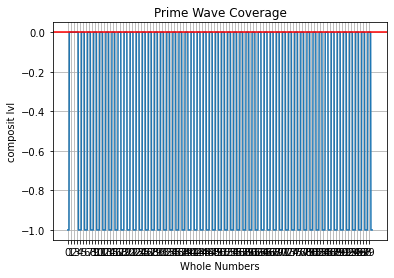

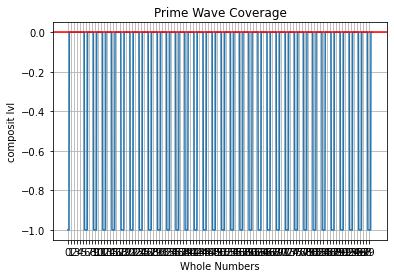

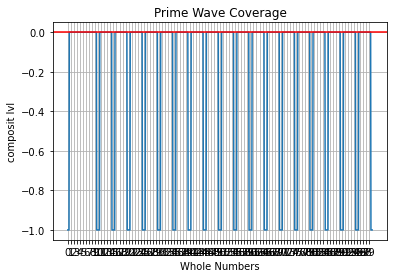

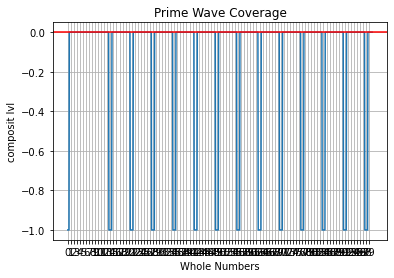

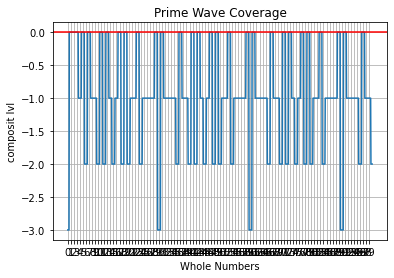

In [ ]:
"""Run - Prototype 1"""
(n2, cover_count2) = Gen_squ_wave(2,100)
(n3, cover_count3) = Gen_squ_wave(3,100)
cc_super_pos = cover_count3 + cover_count2
# Plot the square wave
plot.plot(n2, cc_super_pos)
plot.xticks(range(0, int(max(n2)), 1))
# Give x,y,title axis label
plot.xlabel('Whole Numbers')
plot.ylabel('composit lvl')
plot.title('Prime Wave Coverage')
plot.axhline(y = 0, color = 'r')
# Display
plot.grid()
plot.show()


#1 =  Known prime
#0 = found primes (w/ some error read below) 
#<0 =  level of composition (number of unique primes that lead to composite)
# result wave has freq of summed know prime -> 2w+w3+w5 => f = 2*3*5 = 30 

In [56]:
'''
Note's:

if wave_p[x_P] = -1 then
    x_P is a component of the prime number oscilation period

if wave_p[x_c]< 0 then 
    x_c is a composite number

if wave_p[x_p] = 0 and x_n is 1st whole number = 0 in wave_p[:] then
    x_p is a prime number

if wave_p[x_f] = 0 ans x_n is not 1st whole number = 0 in wave_p[:] then
    x_f is an found prime or composite number
    if x_f in (x_p, x_p^2) or (x_p^2, x_p*(x_p+1)) or ... :
        x_f is a prime number called x_fp
    else if x_f in [x_p^2, x_p*(x_p+1), (x_p+1)^2, ...] :
        x_f is a compsite number called x_fc

coverage of all whole numbers:
-> (1/p2 + 1/p3 + 1/p5 - 1/p5*p2 - 1/p2*p3 - 1/p2*p3*p5)*100 = coverage%
-> (+ sum(n_choose_1_comb(1/p[:])) 
    - (sum(n_choose_2_comb(1/p1[:]*p2[:])) + ... + sum(n_choose_n-1_comb(1/p1[:]*...*p(n-1)[:]))) 
    - (1/p[0]*...*p[n])) * 100 
    = coverage%
'''

"\nNote's on Error and Effeciency:\nFirst error at p^2 for first p not added\ne.g.\nw2+w3 - first error 25 = 5^2 \n1,2,3,4,[5],6,[7],8,9,... (1/2)*100 + (1/3)*100 = 50+33.3 = covers 83.3% of numbers\n1x2, 1x3, \n2x2, 2x3, \n3x2, 3x3, \n4x2, 4x3, \n5x2, 5x3,\n[No 5x5] -  first error will occure here as 5x2,5x3,5x4,[No 5x5], 5x6 = is covered \n6x2, 6x3\n"

In [ ]:
'''            
Recusive formula for finding primes:
start with:
    wave_P2
for x in wave_P2:
    if wave_P2[x] = 0 then 
        x_f = x
        if x_f is 1st whole number = 0 in wave_p[:]:
            x_fp = x_f
            fp_list.add(x_fp)
        else:
            l = LEN(wave_P2)//2
            r = 1
            while not compsite or prime:
                binary_search(wave_P2) - is x_f between fp or fp multiples
                    true  - x_fp = x_f
                    false - x_fc = x_f


generate waves from fp_list
wave_P234...X = wave_P2 + wave_P3 + wave_P5 + ... + wave_PX

start with :
    wave_P = wave_P234...X
    repeat alorgithm 

'''

In [ ]:
'''
improve formula
x_wave[0:i] = A*cos((2pi/x)*[0:i]-pi)-A
A - scaling factor

g_wave[0:i] = cos((2pi/x)*[0:i]-pi)

Are Prime numbers infitie , would with function ever each a sumation were ine last wave is needed for all numbers to innifty?
not sure, but leaning towards no.

from what this function describes:
prime_a_wave + prime_b_wave = prime_x_wave 
inifinity - prime_x_wave = prime_c_wave + prime_b_wave + prime_c2_wave + prime_d_wave + prime_e_wave + prime_b2_wave
------- ------ ---------- ------ -------------
---- -------- ----------- ------- ------------
this function finds prime numbers but also composit numbers seen as "errors"
intruth its not an error. those commposites are made up of prime numbers that hasn't been discovered yet. 
it might as well be a prime number and the only way to tell is by finding is sqare, cube, etc. root or
finding a number between the largest known prime number and that number which when divided by gives you a whole number

those we can think of all numbers as prime numbers but some numbers are more prime than others. (composit level)

how easy is it to verify we have a very prime number
operator(x_wave) check if factor: O(1)

operator(x_wave) check if square: O(1)
sq_x_wave => x_wave_1/2_periods
cb_x_wave => x_wave_1/3_periods

operator(x_wave) check if square root: O(1)
sqrt_x_wave => x_wave_2x_periods
cbrt_x_wave => x_wave_3x_periods

operator(x_wave) check if composit of 2 unknow prime: O(1)
sqrt_x_wave => x_wave_1/2_periods
cbrt_x_wave => x_wave_1/3_periods

operator(p_wave) check if perfect x_number: O(2^p_list)
for(_[0:p_wave]){if(p_wave[x_number]=1){list.add(p_wave)}}} -> p_list
sum(dfs_combintion(p_list)->c_list) == X_number

operator(x_wave) check if perfect x_number is a number: O(x_waves)
Quantum Computer - check if this qubit state resonates with this value and add to list (num_qubits num_gate_stages)
for(_[0:x_wave]){if(x_wave[x_number]=1){list.add(x_wave)}}} -> x_list
sum(x_list) == X_number
'''